## You can submit a job to EMR using livy, a rest interface for Spark:

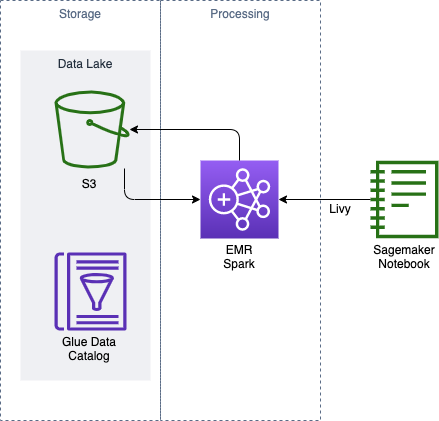

## Retrieve your account number and set a bucket name

In [ ]:
import simplejson
with open('/opt/ml/metadata/resource-metadata.json') as fh:
    metadata = simplejson.loads(fh.read())
accountid = metadata['ResourceArn'].split(':')[4]

%set_env accountid={accountid}
%set_env bucket_name=lab-{accountid}

## Copy the config file that points to your EMR cluster

In [ ]:
%%bash
cp /home/ec2-user/SageMaker/Analytics_Labs/config.json /home/ec2-user/.sparkmagic/config.json 

## Restart your kernel clicking **Kernel / Restart Kernel**

## Check if you can access the EMR cluster

In [ ]:
%%info

## Create a Dataframe running a SparkSQL query in the movies table

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
df = sqlContext.sql("SELECT * FROM movielens.best_movies")
df.show()

## Write the result to a new "Test" table in the Data Lake

In [ ]:
accountid = ""

df.write.format("parquet").mode("overwrite").option("path", "s3://<>/" + accountid + "/data/processed/test").saveAsTable("movielens.test");

## Query the test table and print the results...

In [ ]:
df_test = sqlContext.sql("SELECT * FROM movielens.test")

In [ ]:
df_test.show(5)